# Global COVID-19 Data Analysis

This notebook provides a comprehensive analysis of global COVID-19 cases, examining patterns and trends across countries and regions. The visualizations in this notebook are designed to highlight key insights into the pandemic's progression and impact worldwide.

In [51]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
data = pd.read_csv('time_series_covid19_confirmed_global.csv')

## Data Preparation

In this section, we import the necessary libraries for data analysis and visualization, and load the COVID-19 global dataset. The dataset contains time series data of confirmed COVID-19 cases across different countries and regions.

In [52]:
# check the data
data.info()
data.describe()
data.isnull().sum()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


### Data Exploration

Before diving into analysis, we examine the structure and quality of our dataset. This helps us understand the variables available, identify any missing values, and get a sense of the data distribution.

In [53]:
# transform the data, wide format is not suitable for time series analysis
df = data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                var_name='date', 
                value_name='cases'
            )

# turn that date column into datetime format, specify!
df['date'] = pd.to_datetime(df['date'],  format='%m/%d/%y')

### Data Transformation

The original dataset is in a wide format, which is not optimal for time series analysis. We transform it to a long format where each row represents a specific date and location. We also ensure the date column is properly formatted as a datetime object to facilitate time-based operations.

In [54]:
# create a dataframe with only the data we care about 
country_daily = df.groupby(['Country/Region', 'date'])['cases'].sum().reset_index()

# rename columns for clarity
country_daily.rename(columns={'Country/Region': 'country'}, inplace=True)

# calculate the daily new cases
country_daily['new_cases'] = country_daily.groupby('country')['cases'].diff()

# lower case everything in the country column
country_daily['country'] = country_daily['country'].str.lower()

### Creating Daily Cases Dataset

To perform meaningful analysis, we need to aggregate the data at the country level and calculate daily new cases. This transformation allows us to track the day-to-day evolution of the pandemic in each country, rather than just looking at cumulative totals.

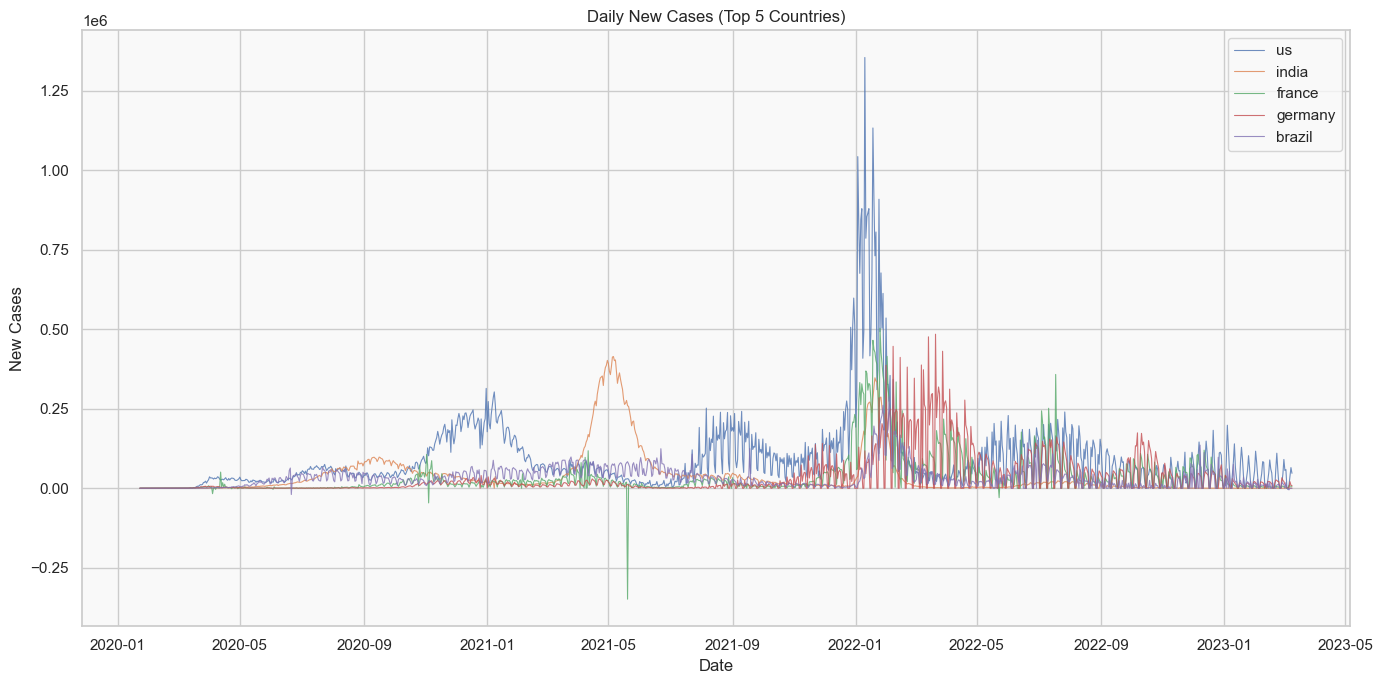

In [63]:
# a quick visualisation of the top 5 countries
top = country_daily[country_daily['date'] == country_daily['date'].max()] \
        .sort_values('cases', ascending=False).head(5)['country']

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid", {"axes.facecolor": "#f9f9f9"})

for c in top:
    subset = country_daily[country_daily['country'] == c]
    plt.plot(subset['date'], subset['new_cases'], label=c, linewidth=0.8, alpha=0.8)

plt.legend()
plt.title('Daily New Cases (Top 5 Countries)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


## Daily New Cases in Top 5 Countries

This visualization tracks the daily new COVID-19 cases for the five countries with the highest total case counts. Daily new case data provides insight into infection rates and can indicate whether the pandemic is accelerating, stabilizing, or declining in these regions.

**Interpretation:**
- The sharp spikes in the graph represent sudden increases in reported cases, which could be due to actual outbreaks, changes in testing capacity, or reporting delays
- The volatile nature of daily data demonstrates the challenges in real-time pandemic monitoring
- Comparing patterns across countries reveals differences in pandemic timing, intensity, and possibly effectiveness of public health measures

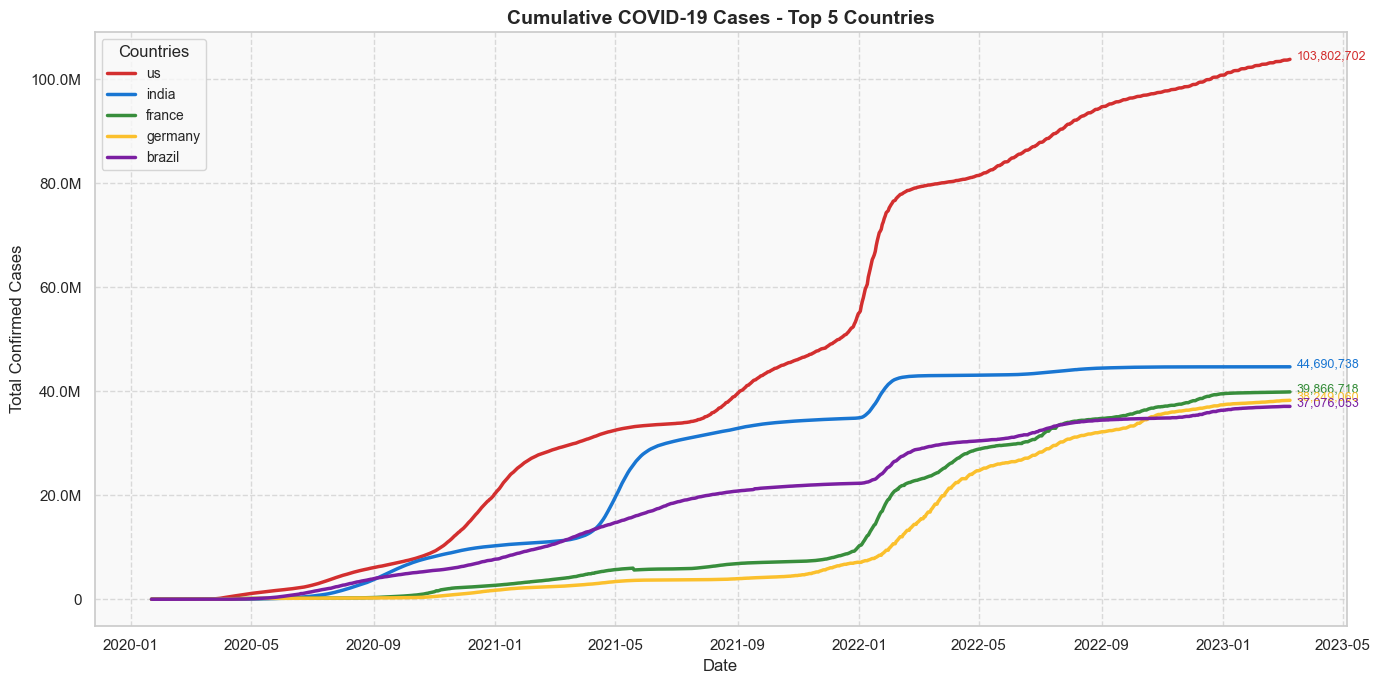

In [66]:
# A visualization of cumulative cases for the top 5 countries
top = country_daily[country_daily['date'] == country_daily['date'].max()] \
        .sort_values('cases', ascending=False).head(5)['country']

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid", {"axes.facecolor": "#f9f9f9"})

# Better colors for distinction
colors = ['#D32F2F', '#1976D2', '#388E3C', '#FBC02D', '#7B1FA2']

for i, c in enumerate(top):
    subset = country_daily[country_daily['country'] == c]
    # Use the cumulative case count directly
    plt.plot(subset['date'], subset['cases'], linewidth=2.5, 
             label=c, color=colors[i])
    
    # Add annotation for final values
    last_date = subset['date'].max()
    last_value = subset[subset['date'] == last_date]['cases'].values[0]
    plt.annotate(f"{int(last_value):,}", 
                xy=(last_date, last_value),
                xytext=(5, 0), 
                textcoords='offset points',
                fontsize=9,
                color=colors[i])

# Improve the formatting
plt.legend(fontsize=10, title="Countries")
plt.title('Cumulative COVID-19 Cases - Top 5 Countries', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Confirmed Cases', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

## Cumulative COVID-19 Cases in Top 5 Countries

This visualization shows the total accumulated COVID-19 cases over time for the five most affected countries. Cumulative case counts provide a big-picture view of the pandemic's overall impact on different nations.

**Interpretation:**
- The steepness of each curve indicates the rate of spread - steeper sections represent periods of rapid case growth
- Plateauing curves suggest slowing transmission, potentially due to effective interventions or approaching saturation in vulnerable populations
- The final values show the total pandemic burden for each country, though these should be interpreted with awareness of differences in testing strategies and reporting methods
- Diverging lines indicate different trajectories of the pandemic across countries, reflecting variations in population size, density, public health responses, and other factors

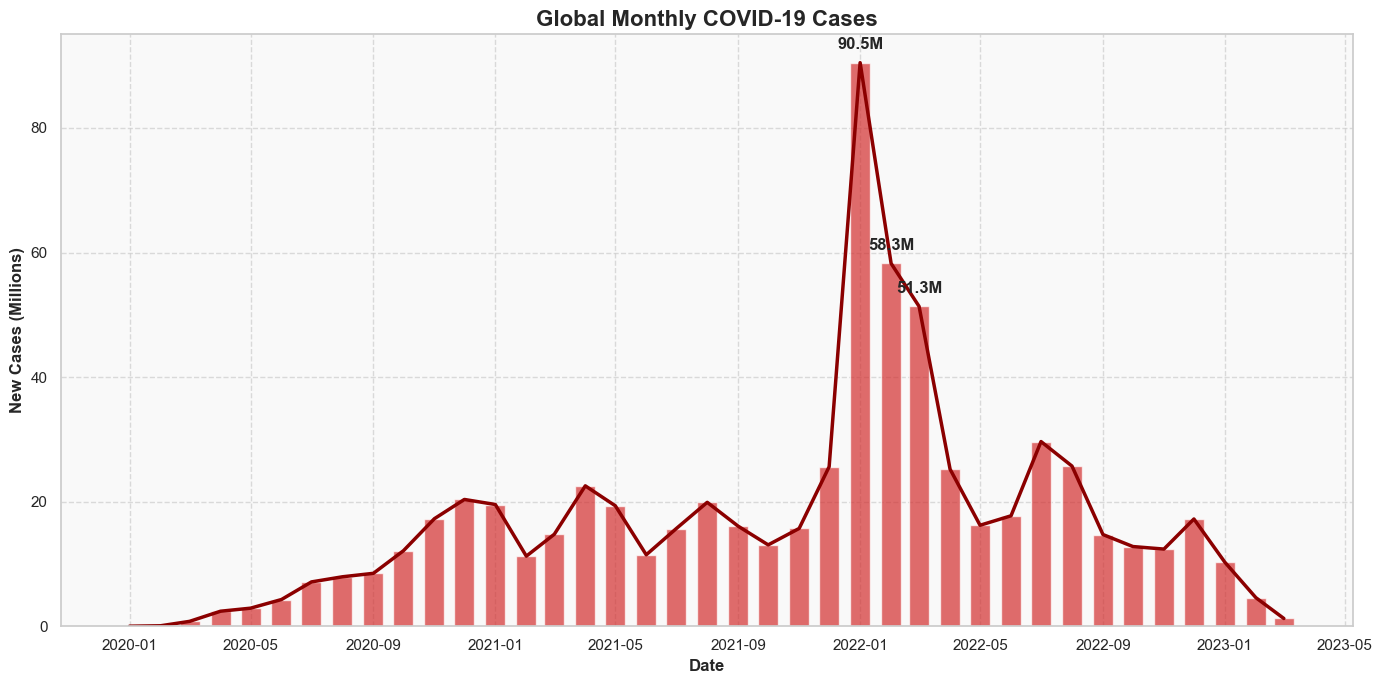

In [78]:
# Define regions (simplified for illustration)
regions = {
    'North America': ['us', 'canada', 'mexico'],
    'South America': ['brazil', 'peru', 'colombia', 'argentina', 'chile'],
    'Europe': ['uk', 'france', 'italy', 'spain', 'germany', 'russia'],
    'Asia': ['india', 'iran', 'indonesia', 'japan', 'china', 'south korea'],
    'Africa': ['south africa', 'morocco', 'egypt', 'ethiopia', 'kenya'],
    'Oceania': ['australia', 'new zealand']
}

# Get global monthly totals
global_monthly = country_daily.copy()
global_monthly['year_month'] = global_monthly['date'].dt.strftime('%Y-%m')
global_totals = global_monthly.groupby('year_month')['new_cases'].sum().reset_index()

# Convert to datetime for better plotting
global_totals['date'] = pd.to_datetime(global_totals['year_month'] + '-01')
global_totals = global_totals.sort_values('date')

# Plot global monthly totals
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid", {"axes.facecolor": "#f9f9f9"})

plt.bar(global_totals['date'], global_totals['new_cases']/1000000, 
        color='#D32F2F', alpha=0.7, width=20)

# Add trend line
plt.plot(global_totals['date'], global_totals['new_cases']/1000000, 
         color='darkred', linewidth=2.5)

# Add labels for notable peaks
# Find the top 3 peaks
peak_indices = global_totals['new_cases'].nlargest(3).index
for idx in peak_indices:
    peak_date = global_totals.loc[idx, 'date']
    peak_value = global_totals.loc[idx, 'new_cases']/1000000
    plt.annotate(f"{peak_value:.1f}M", 
                xy=(peak_date, peak_value),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontweight='bold')

# Format the plot
plt.title('Global Monthly COVID-19 Cases', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('New Cases (Millions)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Global Monthly COVID-19 Case Trends

This bar chart displays the total number of new COVID-19 cases reported worldwide each month, with a trend line overlay to highlight the overall pattern. This monthly aggregation smooths out daily reporting inconsistencies and provides a clearer view of the pandemic's waves.

**Interpretation:**
- The chart reveals distinct pandemic waves on a global scale, with notable peaks representing major surges in transmission
- The annotated peak values highlight the months with the most intense global spread
- The trend line helps distinguish the overall pattern from month-to-month variations
- These global patterns reflect the combined effect of different regional outbreaks, often happening at different times
- The timing of peaks may correlate with the emergence of new variants, seasonal factors, or changes in global mobility and restrictions

## Conclusions and Insights

The visualizations in this notebook reveal several key insights about the global COVID-19 pandemic:

1. **Temporal Patterns**: The pandemic has progressed in distinct waves globally, with different timing and intensity across regions.

2. **Geographic Variation**: The burden of COVID-19 has been unevenly distributed, with some countries experiencing disproportionately high case counts.

3. **Reporting Complexities**: Daily data shows high volatility, highlighting the challenges in real-time pandemic monitoring and the importance of looking at trends rather than single-day figures.

4. **Pandemic Evolution**: The changing patterns over time reflect the complex interplay of viral evolution, human behavior, policy interventions, and seasonal factors.

These insights underscore the importance of coordinated global health responses and the value of data-driven approaches to pandemic management. Future analyses could explore the relationship between case trends and policy interventions, demographic factors, or the emergence of new variants.